<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Resources" data-toc-modified-id="Resources-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Resources</a></span></li></ul></div>

## Resources
https://www.forbes.comsitesjamesconca20160907the-connection-between-earthquakes-and-fracking#13e0e3ff6d68

http://news.nationalgeographic.comnews201403140310-earthquakes-usgs-california-faults-science https://en.wikipedia.orgwikiSeismic_wave 

In [ ]:
# Imports

import os
import math

import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

import utilities.utils as utils

In [ ]:
help(pd.read_csv)

In [ ]:
# Display options
%matplotlib inline
utils.pd_display(max_rows=None, max_cols=100)

pd.set_option('max_rows', None)

In [23]:
# Data
datafile = 'earthquakes.csv'
path = 'data'
filename = os.path.join('.', path, datafile)

# Read it in
usecols = ['time', 'latitude', 'longitude', 'depth', 'mag', 'place', 'type' ]
df = pd.read_csv(filename, usecols=usecols, parse_dates=True)

# Clean it up
df.rename({'longitude': 'long', 'latitude': 'lat'}, axis=1, inplace=True)

df.index = pd.to_datetime(df["time"])

df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year

df.drop('time', axis=1, inplace=True)
df.head()

,time,lat,long,depth,mag,place,type
time,,,,,,,
2017-09-19 16:56:50.540000+00:00,2017-09-19T16:56:50.540Z,36.020500,-117.765667,1.520,2.45,"16km NE of Little Lake, CA",earthquake
2017-09-19 16:15:29.900000+00:00,2017-09-19T16:15:29.900Z,37.510502,-118.833832,2.630,2.92,"19km SE of Mammoth Lakes, California",earthquake
2017-09-19 15:35:09.030000+00:00,2017-09-19T15:35:09.030Z,42.617400,-111.483500,4.520,3.10,"10km ESE of Soda Springs, Idaho",earthquake
2017-09-19 15:27:13.670000+00:00,2017-09-19T15:27:13.670Z,42.613500,-111.442900,8.340,3.50,"14km ESE of Soda Springs, Idaho",earthquake
2017-09-19 15:26:56.200000+00:00,2017-09-19T15:26:56.200Z,36.451600,-98.796500,6.125,2.50,"34km NW of Fairview, Oklahoma",earthquake


Function to figure out the distance between an earthquake hypocenter and a fracking hypocenter.

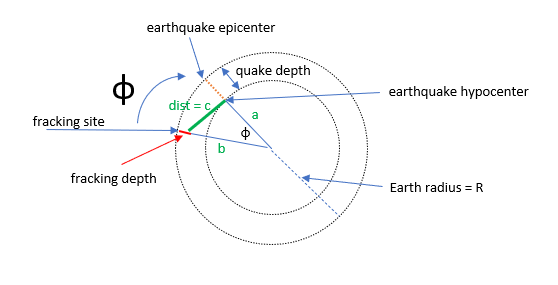

The USGS measures quake depth (km), magnitude, time, and location of every earthquake.   From this we can derive the distance between the actual fracking (typically 2-3 km) and the actual earthquake site (hypocenter.

We want the actual distance between the earthquake hypocenter and the fracking location.   This metric isn't perfect - the earthquake hypocenter is "where it all began" as opposed to all the places the rupture propogated.   But at least it can be consistent across events.

Using a bit of trig:

a = earth_radius - quake_depth
b = earth_radius - frack_depth
theta = haversine_dist(fracking_site, quake_epicenter) / earth_circumferance

dist = c = a**2 + b**2 = 2*a*b*cos(theta)

In [72]:
def rad_2_deg(rad):
    return rad * 180 / pi

def deg_2_rad(deg):
    return deg * pi / 180

def linear_dist_sphere(radius, surf_dist, depth_a, depth_b):
    """ 
    The purpose of this function is to find the actual, linear distance between the hypocenter of 
    and earthquake and the bottom of a fracking well.  It's a more general problem/solution, though:
    
    returns c:  Linear distance through a sphere between two points at or beneath the surface of a sphere
    inputs:
        radius: radius of the sphere;       
        surf_dist: 'Great Circle' distance between the epicenters of the two points, along surface of sphere;    
        depth_a, depth_b:  Depth of each of the two points beneath the surface.
    
    """
    from math import cos, pi, sqrt
    circumferance = 2 * pi * radius
    theta_rad = (surf_dist / circumferance) * ( 2 * pi )
    
    a = radius - depth_a
    b = radius - depth_b
    c = sqrt(a**2 + b**2 - 2 * a * b * cos(theta_rad))
    return c

In [81]:
from math import cos, pi, sqrt

RADIUS_EARTH_KM = 10# 6367
RADIUS_EARTH_KM = 6367
quake_depth = 0 
frack_depth = 1000
dummy_haversine_dist_km = 1000

linear_dist_sphere(RADIUS_EARTH_KM, dummy_haversine_dist, quake_depth, frack_depth)


#earth_circ_km = 2 * pi * RADIUS_EARTH_KM

#a = RADIUS_EARTH_KM - quake_depth
#b = RADIUS_EARTH_KM - frack_depth

#theta_rad = (dummy_haversine_dist_km / earth_circ_km) * ( 2 * pi )
#theta_deg = rad_2_deg(theta_rad)

#dist = sqrt(a**2 + b**2 - 2 * a * b * cos(theta_rad))

#print(f"a: {a}  b: {b}  theta_rad: {theta_rad: .3f}  theta_deg {theta_deg:.2f}  dist {dist:.3f}  earth_circ: {earth_circ:.1f}")

1000.0421461111969

In [69]:
theta / 2*pi

1.5707963267948966

In [30]:
RADIUS_EARTH_KM = 6367
quake_depth = 100
frack_depth = 100
dummy_haversine_dist = 100
earth_circ = 2 * pi * RADIUS_EARTH_KM

a = RADIUS_EARTH_KM - quake_depth
b = RADIUS_EARTH_KM - frack_depth
theta = dummy_haversine_dist / earth_circ
dist = a**2 + b**2 - (2 * a * b * cos(theta))

print(f"a: {a}  b: {b}  theta: {theta: .3f}  dist {dist:.3f}")

a: 6267  b: 6267  theta:  0.002  dist 245.409


In [ ]:
# Make a datetime index and columns for year, month, day
df.index = pd.to_datetime(df["time"])
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df.drop('time', axis=1, inplace=True)
df

In [ ]:
df.dtypes

In [ ]:
# pick off just the desired columns
df = pd.read_csv(filename, usecols=['depth', 'mag',  'place'])

# parse out the 'place' column
df['place'] = df['place'].astype(str)
df['place'] = df['place'].str.split(',').str.get(1)
df['place'] = df['place'].str.strip()
df['place'] = df['place'].str.replace("CA", "California")

df.head(3)

ok = df.query("place=='Oklahoma'")
cal = df.query("place=='California' and depth>0")

quakes = pd.concat([ok, cal])  # ok on top, then cal
quakes.reset_index(inplace=True, drop=True)  # make new (unique) index
quakes.head(2)

In [ ]:
quakes.tail(2)

In [ ]:
quakes.describe()

In [ ]:
# dependent and independent variables
print(quakes.columns)
iv_names = ['depth', 'mag']
dv_name = 'place'

In [ ]:
# create categorical data descriptions
auto_cats = pd.Categorical(quakes['place'])
quakes['place_ix'] = auto_cats.codes
quakes.head(2)
auto_cats.describe()

In [ ]:
# have a look
sns.set()
sns.pairplot(quakes[['depth', 'mag', 'place']],
             hue="place",
             diag_kind="kde")

In [ ]:
# Run the D'Agostino K-squared (skew+kurotsis) test

p_target = .05  # if the p-value is less that this, we fail the test

for iv in iv_names:
    data = quakes[iv]
    statistic, p = scipy.stats.normaltest(data)
    if p < p_target:
        result = 'FAILED. SAD!'
    else:
        result = 'passed'
    print("\tfeature: {:<10} {:<20} p={:<10}".
          format(iv, result, round(p, 4)))

In [ ]:
# create a plot object
plt.figure()

# set up the rows/columns for our plot object
cols = 3
rows = math.ceil(len(iv_names)/cols)

row = 1
col = 1
subplot = 1
for iv in iv_names:
    data = df[iv]  # grab the data
    plt.subplot(rows, cols, subplot)  # create the subplot object
    scipy.stats.probplot(data, plot=plt)  # stuff it w/ data
    plt.title(iv)  # give it a nice title
    # reset indices
    col += 1
    if col > cols:
        col = 1
        row += 1
    subplot += 1

# spruce it up aesthetically
fig = plt.gcf()  # get current figure - figure object is main container
fig.canvas.set_window_title("Q-Q Charts")

plt.tight_layout()  # alternative:  plt.subplots_adjust()

In [ ]:
# Hmmm ... a little sketchy, but let's forge on.

In [ ]:
# spin up an instance of the LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)

In [ ]:
# split the data file
from sklearn.model_selection import train_test_split

# could do this manually, but it's built-in.  ".5" makes a 50/50 split
train, test = train_test_split(quakes, test_size=.5)

train_data = train[['depth', 'mag']].values
train_class_ix = train['place_ix']

test_data = test[['depth', 'mag']].values
test_class_ix = test['place_ix']
# train_data

In [ ]:
# use fit() to produce component vectors
train_result = lda.fit(train_data, train_class_ix)

# raw_data = quakes[iv_names].values  #a ndarray.
tlda_result = train_result.transform(train_data)

#train_success_rate=train_result.score(train_data, train_class_ix)
print("Training success rate:", round(train_success_rate, 2))

In [ ]:
# Analyze the withheld test data against training model
test_success_rate = train_result.score(test_data, test_class_ix)
print("Test success rate ('naive' data):", round(test_success_rate, 2))